# Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Libraries and Custom Functions](#import-packages)
* [3. Data Exploration/Prep](#data-prep)
* [4. Machine Learning Model](#ml-model)
* [5. Deployment of Model](#model-deployment)

# 1. Problem Background and Motivation <a class="anchor" id="problem-background"></a>

<img src='https://miro.medium.com/max/659/1*glrB0KgjOcTiKUEx7T8tcA.png' width="700" />

In banking system, banks have many products to sell but main source of income of any banks is on its credit line. So they can earn from interest of those loans which they credit. A bank's profit or a loss depends to a large extent on loans i.e. whether the customers are paying back the loan or defaulting. By predicting the loan defaulters, the bank can reduce its Non- Performing Assets.


<b>But who would be interested in this analysis?</b> <br>
The Bank wants to automate the loan approval process based on customer detail provided while filling out online application forms. In such a scenario, a bank can use our model to predict whether a loan has to be approved or not for a particular cutomer. 

* [Go to Top](#table-of-content)

# 2. Libraries & Custom Functions <a class="anchor" id="import-packages"></a>
> **Numpy** : NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. <br> <br>
 **Pandas** : Pandas is a software library written for the Python programming language for data manipulation and analysis. <br> <br>
 
 
 ##### The graphic libraries
 
 >**Seaborn** : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. <br> <br>
 **Matplotlib** : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
 
 ##### The Machine Learning Libraries
 >**Sklearn** : Scikit-learn is a free software machine learning library for the Python programming language featuring various classification, regression and clustering algorithms.
 
* [Go to Top](#table-of-content)

In [13]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing


# Custom function below is used to display performance measures
#Why use performance measure?
#Performance measure correctly evaluate the model being produced to guarantee that the predictions are accurately describing the intended phenomenon. 
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []  #True positives
    TN = []  #True Negatives
    FP = []  #False Positives
    FN = []  #False Negatives 
    recall = []  #The recall is calculated as the ratio between the number of Positive samples correctly classified as Positive to the total number of True Positive and False Negatives. It is used when False Negatives is the costliest mistake you can make
    precision = [] #The Precsion is calculated as the ratio between the number of Positive samples correctly classified as Positive to the total number of True Positive and False Positives. It is used when False Positives are the costliest mistake you can make
    F1 = []    #F1 score is used when we are confused between what to use Recall or Precision? F1 is calculated as a combination of Recall and Precision
    Accuracy = []  #Accuracy gives the overall performance of the model
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "Accuracy": Accuracy
                          })

    # Let's look at our dataframe
    return result

# 3. Data Exploration/Prep <a class="anchor" id="data-prep"></a>
* [Go to Top of Notebook](#table-of-content)

- [ ] [Initial Evaluation](#initial-evaluation)
- [ ] [Initial Cleanup - dupes, missing values](#missing-values)
- [ ] [Outlier Detection & Treatment](#outliers)
- [ ] [Feature Selection](#feature-selection)
- [ ] [Data Partitioning](#data-split)
- [ ] [Data Normalization](#normalization)

> **Initial Evaluation** <a class="anchor" id="initial-evaluation"></a>

In [14]:
# #Once the libraries are imported, we need to load/read our real-life historical data on which the regression model is trained. 
#We do this with the help of our analytical library pandas. Pandas creates a 2-D data structure also known as dataframe for the purpose of easy understanding and viewing of our data
df = pd.read_csv('loan_approval.csv')
df.tail()

,approved,gender,age,debt,married,bank_customer,emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,emp_financials,emp_utilities,emp_education,ethnicity_white,ethnicity_black,ethnicity_latino,ethnicity_asian,ethnicity_other,years_employed,prior_default,employed,credit_score,drivers_license,citizen_bybirth,citizen_other,citizen_temporary,Income
685,0,1,21.08,10.09,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1.25,0,0,0,0,1,0,0,0
686,0,0,22.67,0.75,1,1,1,0,0,0,0,0,0,1,0,0,0,0,2.00,0,1,2,1,1,0,0,394
687,0,0,25.25,13.50,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2.00,0,1,1,1,1,0,0,1
688,0,1,17.92,0.20,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0.04,0,0,0,0,1,0,0,750
689,0,1,35.00,3.38,1,1,1,0,0,0,0,0,0,0,1,0,0,0,8.29,0,0,0,1,1,0,0,0


> **Initial Evaluation: Notes on Findings**<br><br>
>**Observations:**<br>
>>**Target:** task_completed (1 if loan approved, 0 otherwise)<br><br>

>[Go to Data Prep Outline](#data-prep)
---

> **Initial Cleanup - check for duplicate values, missing values** <a class="anchor" id="missing-values"></a>


In [15]:
print('Number of records:', len(df))
df.drop_duplicates()
print('Number of records after dropping dupes:', len(df))

Number of records: 690
Number of records after dropping dupes: 690


In [16]:
df.isnull().sum()

approved                 0
gender                   0
age                      0
debt                     0
married                  0
bank_customer            0
emp_industrial           0
emp_materials            0
emp_consumer_services    0
emp_healthcare           0
emp_financials           0
emp_utilities            0
emp_education            0
ethnicity_white          0
ethnicity_black          0
ethnicity_latino         0
ethnicity_asian          0
ethnicity_other          0
years_employed           0
prior_default            0
employed                 0
credit_score             0
drivers_license          0
citizen_bybirth          0
citizen_other            0
citizen_temporary        0
Income                   0
dtype: int64

> **Initial Cleanup: Summary of Actions**<br><br>
No missing values or duplicates

>[Go to Data Prep Outline](#data-prep)
---

> **Outlier Detection & Treatment** <a class="anchor" id="outliers"></a>

In [17]:
df.describe()

,approved,gender,age,debt,married,bank_customer,emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,emp_financials,emp_utilities,emp_education,ethnicity_white,ethnicity_black,ethnicity_latino,ethnicity_asian,ethnicity_other,years_employed,prior_default,employed,credit_score,drivers_license,citizen_bybirth,citizen_other,citizen_temporary,Income
count,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00
mean,0.44,0.70,31.51,4.76,0.76,0.76,0.36,0.12,0.21,0.08,0.09,0.11,0.04,0.59,0.20,0.08,0.09,0.04,2.22,0.52,0.43,2.40,0.46,0.91,0.08,0.01,1017.39
std,0.50,0.46,11.86,4.98,0.43,0.43,0.48,0.32,0.41,0.27,0.28,0.32,0.19,0.49,0.40,0.28,0.28,0.20,3.35,0.50,0.50,4.86,0.50,0.29,0.28,0.11,5210.10
min,0.00,0.00,13.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,22.67,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
50%,0.00,1.00,28.46,2.75,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,5.00
75%,1.00,1.00,37.71,7.21,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2.62,1.00,1.00,3.00,1.00,1.00,0.00,0.00,395.50
max,1.00,1.00,80.25,28.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,28.50,1.00,1.00,67.00,1.00,1.00,1.00,1.00,100000.00


The mean is sensitive to outliers, but the fact the mean is so small compared to the max value indicates the max value is an outlier. But here all the values are closeby to the mean thus no sign of outlier.

> **Note:**<br>
Skipping for now

> **Outlier Detection: Notes/Summary of Actions**<br>
<br>
>**Note:**<br>
We note that the distribution somewhat follows a normal distribution. Thus, no outliers

>[Go to Data Prep Outline](#data-prep)
---

> **Feature Selection** <a class="anchor" id="feature-selection"></a>
<br>

>**To Do:**<br>
> 1. Include everything<br>


>[Go to Data Prep Outline](#data-prep)
---

> **Data Partitioning** <a class="anchor" id="data-split"></a>
<br>
>To Do:<br>
>1. Put all potential predictor variables into new object called 'X'
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>

>This is simple for now - may need to add more sampling complexity in future


In [18]:
target = ['approved']

X = df.drop(target,axis=1)
y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=5) #changing the random state to check different knn possibilities

>[Go to Data Prep Outline](#data-prep)
---

> **Data Normalization** <a class="anchor" id="normalization"></a>
<br><br>
>**Note:**<br>
>We do this AFTER splitting the data because we only want to use summary stats<br>
>from the TRAINING data to normalize BOTH TRAIN and TEST data<br>
<br><br>
Why do we normalize? <br>
Algorithms tend to perform better or converge faster when the different features (variables) are on a smaller scale. Therefore it is common practice to normalize the data before training machine learning models on it. <br>
>OPTIONAL - though it is a good idea to get in the habit of doing this when working with the kNN classifier

In [19]:
# Normalize predictor variables using Z-Scores.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

>[Go to Data Prep Outline](#data-prep)
---

# 4. Machine Learning <a class="anchor" id="ml-model"></a>

- [X] [kNN](#first-model)
- [X] [Logistic Model](#second-model)
- [ ] [Performance Evaluation](#third-model)


* [Go to Top](#table-of-content)

> **kNN** <a class="anchor" id="first-model"></a>
<br>
>Instructions:<br>
>1. Fit numerous kNN models using different values for k. <br>
>2. Choose the "best" value for "k" based on Accuracy

In [8]:
# 1. train a classifier for different values of k
results = []
for k in [1,3,5,7,9,11,13,15,17,19,21]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put Accuracy Score in results object
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,y_pred_class)
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,accuracy
0,1,0.80
1,3,0.80
2,5,0.82
3,7,0.80
4,9,0.77
5,11,0.78
6,13,0.79
7,15,0.81
8,17,0.80
9,19,0.82


>**Decision:**<br>
Based on the results above, I will set my number of neighbors (k) to 5 as this is the lowest value that achieves the highest accuracy value. I am not using k =21 because higher the number of clusters there is possibility of overfit<br>

>**Re-run kNN using the value selected above:**<br>
For this final run of kNN, we will produce a table of performance measures across a range of probability threshold values

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))


Training data Accuracy: 0.86
Testing data Accuracy: 0.82


>**Logistic Model:**<br>
>Let's produce the same table above but this time using a Logistic Model




In [21]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.88
Testing data Accuracy: 0.87


>**Winning Model:**<br>
We need to quickly decide which modeling framework to go forward with<br>
To keep this simple - I'm going to use AUC and will choose the model that gives us the highest value

C:\Users\dmmehta3\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


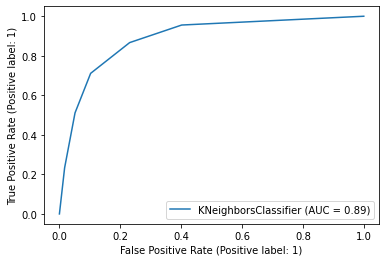

C:\Users\dmmehta3\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


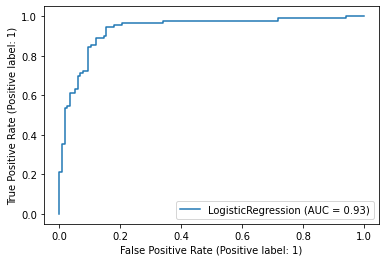

In [22]:
# ROC curve for kNN
metrics.plot_roc_curve(knn,X_test,y_test)
plt.show()

# ROC curve for Logistic Model
metrics.plot_roc_curve(lr_model,X_test,y_test)
plt.show()

>**Decision Point:**<br>
AUC is highest for our Logistic Model so I will use that model to further evaluate probability thresholds and corresponding performance measures

In [12]:
class_perf_measures(lr_model,X_test,y_test)

C:\Users\dmmehta3\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy
0,0.00,90,0,117,0,0.43,1.00,0.43
1,0.10,87,79,38,3,0.70,0.97,0.80
2,0.20,86,95,22,4,0.80,0.96,0.87
3,0.30,85,98,19,5,0.82,0.94,0.88
4,0.40,83,99,18,7,0.82,0.92,0.88
5,0.50,77,104,13,13,0.86,0.86,0.87
6,0.60,66,106,11,24,0.86,0.73,0.83
7,0.70,64,109,8,26,0.89,0.71,0.84
8,0.80,49,114,3,41,0.94,0.54,0.79
9,0.90,35,115,2,55,0.95,0.39,0.72


False Positive: it represents a not approved applicant is predicted as approved <br>
False Negative: it represents an approved is predicted as not approved
1. **Prob Threshold = 0.2**:
    - False Positives : 22
    - False Negatives: 4
    - Relative low threshold required to predict positive outcomes. It means predicted probability should be greater than 0.2 to       be classified into approved class. In our case "positive" means "Loan Approved" Also, here we might label lot of                 employees as loan not approved when in reality they are eligible to get approved.
    - Considering our business, false positives are the costliest mistakes we would make. Because, if a customer is predicted         to be eligible for the loan to be approved and they do not pay back the loan, it results in loss to the bank. 
    - Given our assumptions above - we need to take in consideration the precision value. For probability threshold 0.2 the           precision value is 0.80. We can move forward and check higher probability threshold.
<br><br>
2. **Prob Threshold = 0.6**:
    - False Positives: 11
    - False Negatives: 24
    - relatively higher threshold, it means predicted probability should be greater than 0.6 to be classified into approved           class.  
    - It is  better threshold than 0.2 because of high precision score, more fair predictions and less False Positives. 
<br><br>
3. **Prob Threshold = 0.8**:
    - False Positives: 3
    - False Negatives: 41
    - High threshold. It means predicted probability should be greater than 0.8 to be classified into approved class. 
    - Now, we have more number of True Negatives and 3 false positive. This is a good sign since we were more considered on         false positive rates.
    - Yet, it is not better than 0.6, since it has a lower precision score. 
<br><br>
4. Which threshold would you choose?  Justify your decision. <br>
I would choose 0.6 probability threshold because it gives less False positives, high precision. The bank would decrease the proportion of granting loans to customers who are not eligible to payback depending on the different feature variables. 

>[Go to Machine Learning Outline](#ml-model)
---